In [49]:
x = c("1", "2", "5", "1", "1")
names(x) <- c("First", "S" ,"T", "Fourth", "Fifth")
res <- x=="1"
y <- x[res]
y

First Fourth  Fifth 
   "1"    "1"    "1"

__This is an example of histograms__

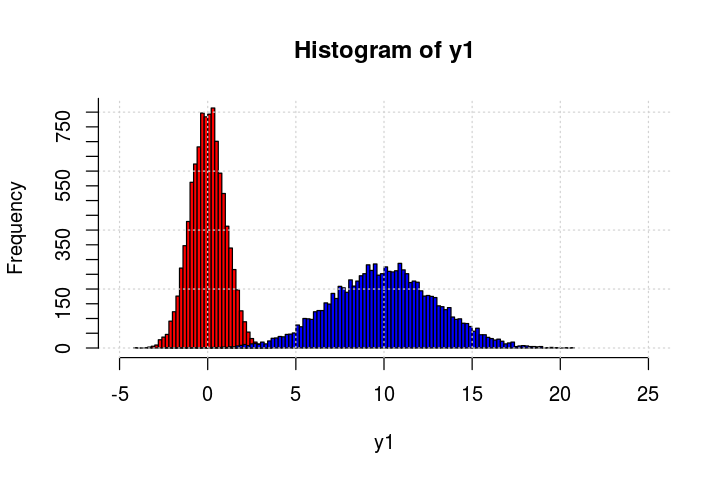

In [55]:
#pdf("toto.pdf")

library(repr)
options(repr.plot.width=6, repr.plot.height=4)

x<-runif(10000)
y1<-qnorm(x)
y2<-qnorm(x, mean=10, sd=3)
hist(y1, breaks=50, xlim=c(-5, 25), col="red", yaxt="n")
hist(y2, breaks=100, add=T, col="blue")
grid()
axis(2, at=seq(0, 2000, by=50))
#dev.off()

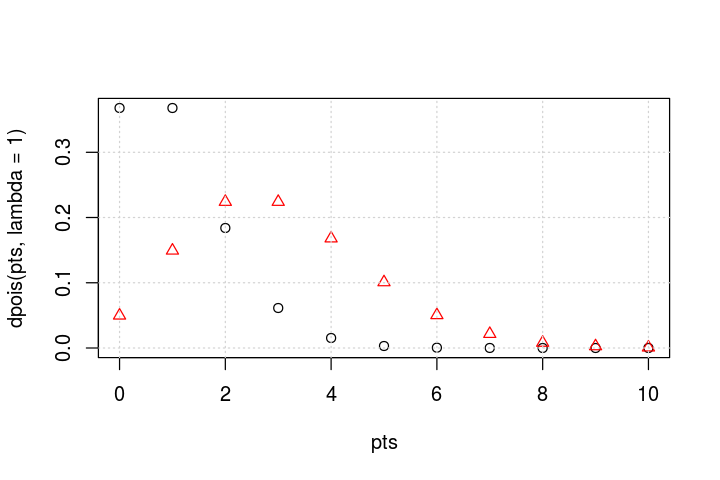

In [22]:
# Poisson example

pts = seq(0, 10, by=1)
plot(pts, dpois(pts, lambda=1))
points(pts, dpois(pts, lambda=3), pch=2, col="red")
grid()

__This is an example of histogram overlayed with some pdfs__

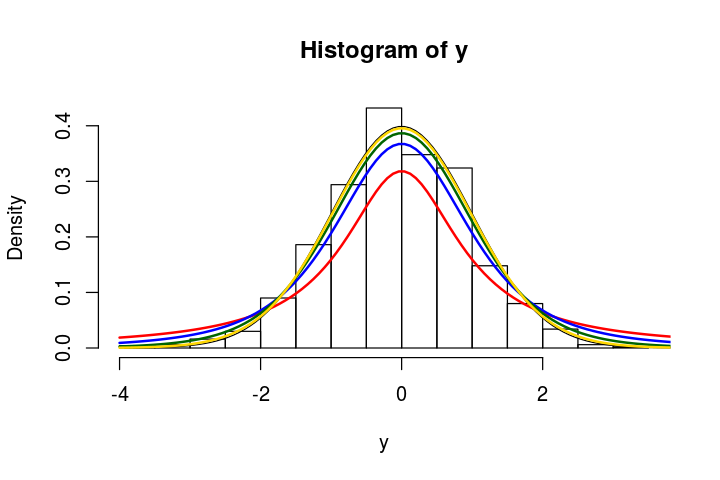

In [23]:
# Display the Student's t distributions with various
# degrees of freedom and compare to the normal distribution

x <- seq(-4, 4, length=100)
hx <- dnorm(x)

degf <- c(1, 3, 8, 30)
colors <- c("red", "blue", "darkgreen", "gold", "black")
labels <- c("df=1", "df=3", "df=8", "df=30", "normal")

y <- rnorm(1000)

hist(y, prob=T)

lines(x, hx)

for (i in 1:4){
  lines(x, dt(x,degf[i]), lwd=2, col=colors[i])
}

#legend("topright", inset=.05, title="Distributions",
#  labels, lwd=2, lty=c(1, 1, 1, 1, 2), col=colors)

__This is an example of plots in multiple pads__


Call:
	density.default(x = age.exploded, adjust = 2)

Data: age.exploded (7545 obs.);	Bandwidth 'bw' = 0.6757

       x                y            
 Min.   :-2.027   Min.   :3.444e-05  
 1st Qu.: 3.986   1st Qu.:4.225e-03  
 Median :10.000   Median :1.787e-02  
 Mean   :10.000   Mean   :4.153e-02  
 3rd Qu.:16.014   3rd Qu.:6.767e-02  
 Max.   :22.027   Max.   :1.496e-01  

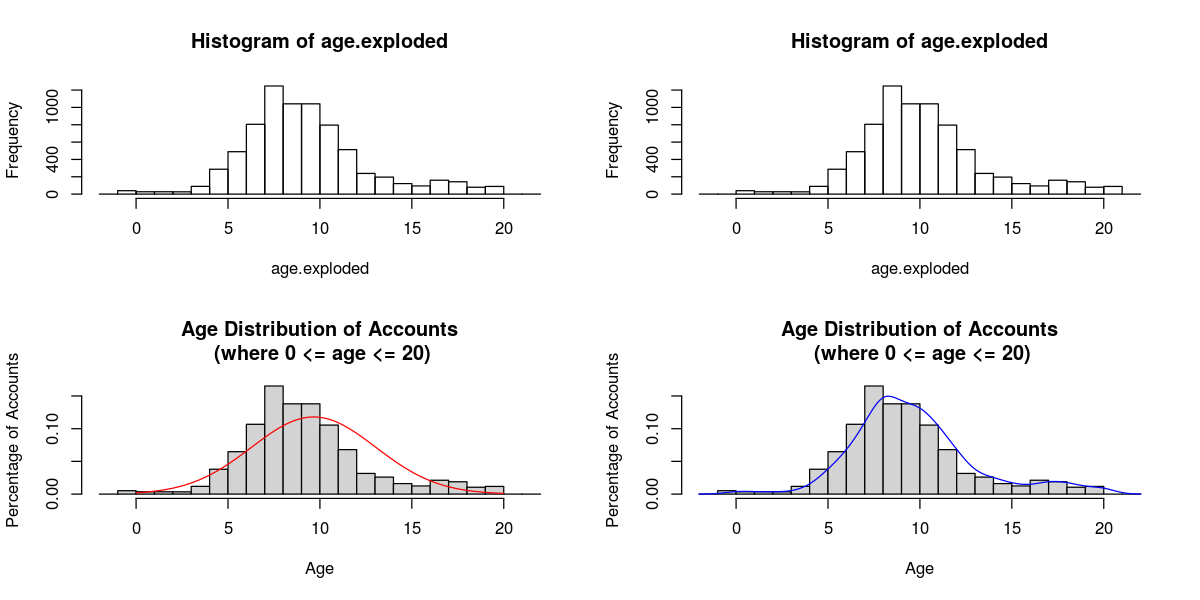

In [24]:
sample_data <- read.csv("test_data.csv")
age.exploded <- rep.int(sample_data$age, sample_data$count)

par(mfrow = c(2, 2))

options(repr.plot.width=10, repr.plot.height=5)

hist(age.exploded, breaks=seq(-2, 22, 1))

hist(age.exploded, breaks=seq(-2, 22, 1), right=F)

hist(age.exploded, breaks=seq(-2, 
  22, by=1), xlab = "Age", ylab= "Percentage of Accounts", 
  main = "Age Distribution of Accounts\n (where 0 <= age <= 20)", 
  col= "lightgray", prob=T)

mypts<-seq(min(age.exploded), max(age.exploded), length.out=200)

points(mypts, dnorm(mypts, mean(age.exploded), sd(age.exploded)), type="l", col="red")

hist(age.exploded, breaks=seq(-2, 
  22, by=1), xlab = "Age", ylab= "Percentage of Accounts", 
  main = "Age Distribution of Accounts\n (where 0 <= age <= 20)", 
  col= "lightgray", prob=T)

dens<-density(age.exploded, adjust=2)
dens

lines(dens, col="blue")



__This is an example of histogram overlayed with some other graphics.
Not completely understood as xaxis of the two objects don't match automatically__

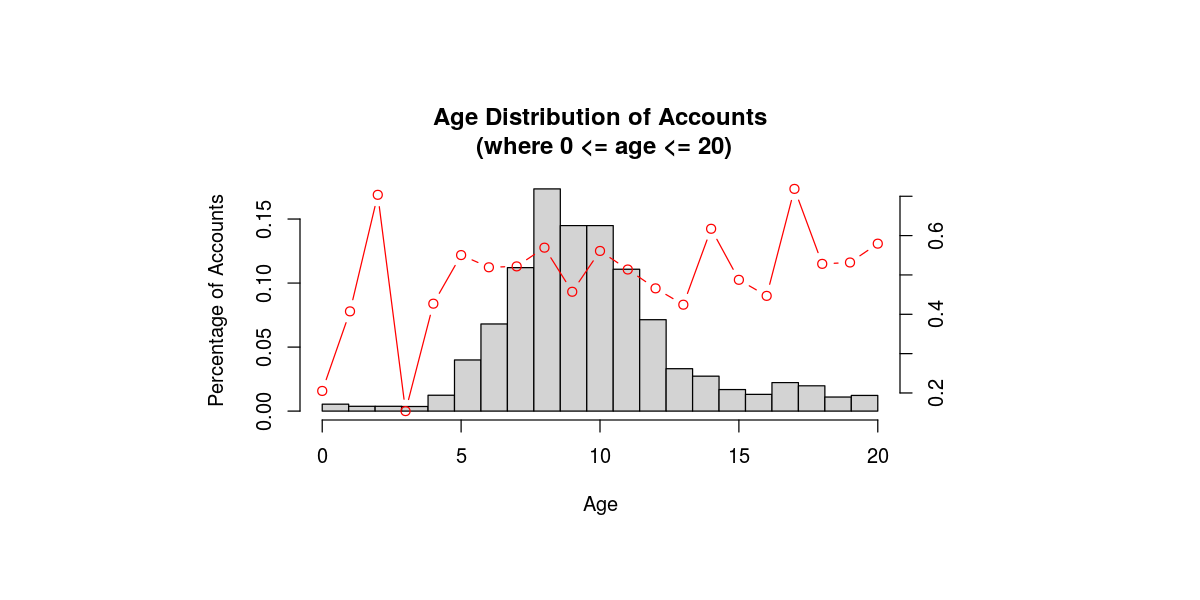

In [25]:
par(pin = c(5, 2))

hist(age.exploded, xlab = "Age", breaks=seq(min(age.exploded), max(age.exploded), length=22), ylab= "Percentage of Accounts", 
  main = "Age Distribution of Accounts\n (where 0 <= age <= 20)", 
  col= "lightgray", prob=T)

par(new=T)
plot(sample_data$age, sample_data$subscribe_pct, xlab= "", ylab="", type = "b", col = "red", axes=F)   
axis(4)


__This is an example of generation of a log normal r.v from a uniform r.v.__

[1] "The mean (sd) is: 1.68 (0.34)"

[1] "The theoretical mean (sd) is: 1.68 (0.34)"

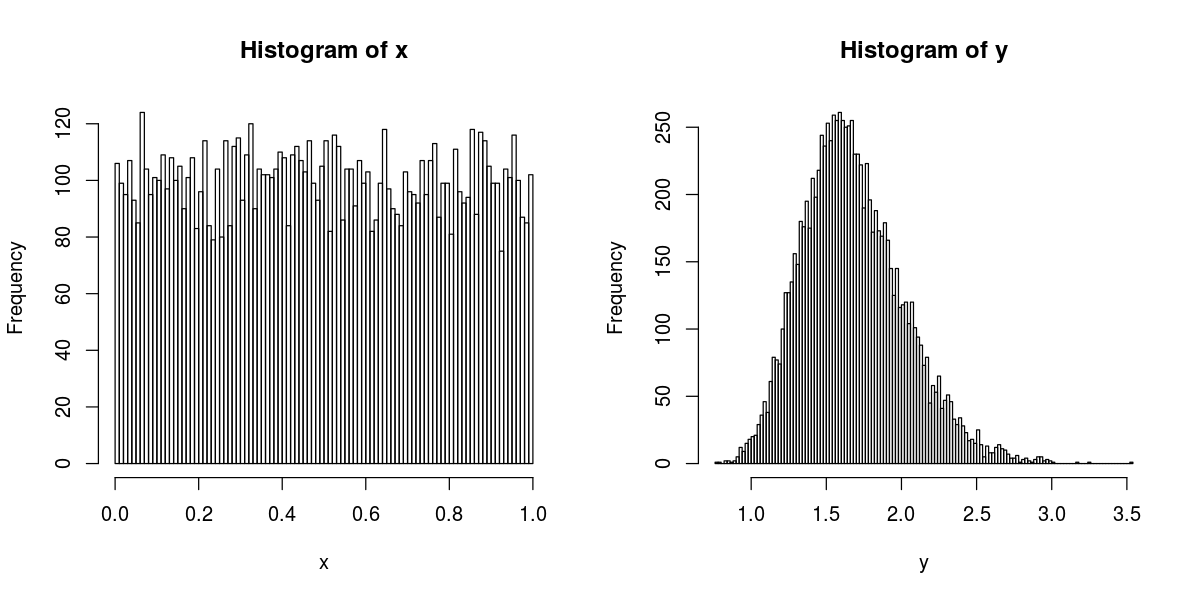

In [26]:
par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
x<-runif(10000)
hist(x, breaks=100)
mu<-0.5
sigma<-0.2
y<-qlnorm(x, mu, sigma)
hist(y, breaks=100)

sprintf("The mean (sd) is: %.2f (%.2f)", mean(y), sd(y))
meant<-exp(mu+sigma^2/2)
sdt<-sqrt((exp(sigma^2)-1)*exp(2*mu+sigma^2))
sprintf("The theoretical mean (sd) is: %.2f (%.2f)", meant, sdt)

# Illustration of the central limit theorem

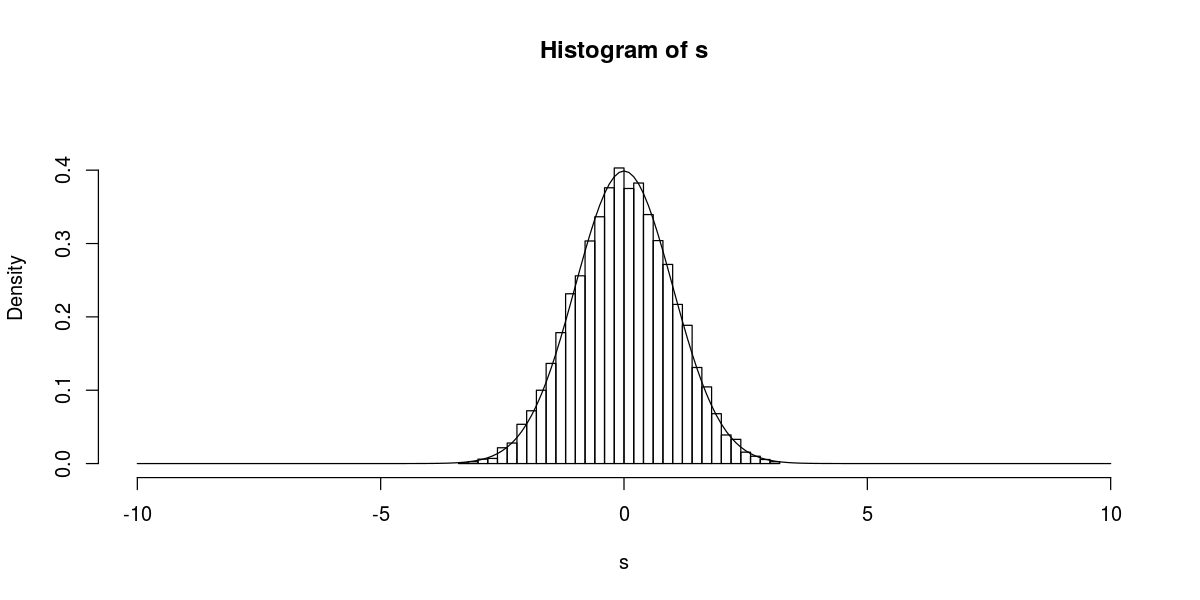

In [27]:
N=10000
Nterms=6

s = c()

min = 0
max = 1
avg = (min+max)/2
stddev = (max-min)/sqrt(12)


for (i in 1:N) {
    vars = runif(Nterms, min = min, max = max)
    s[i] = (mean(vars) - avg)/(stddev/sqrt(Nterms))
}

hist(s, breaks=40, xlim=c(-10,10), ylim=c(0, dnorm(0)*1.2), prob=T)

pts = seq(-10, 10, by=0.1)
lines(pts, dnorm(pts))

The following is an example of $K^2$ and KS test with R

It is the R application of the exemple at section 9.3 of B. Clement's book (p.90) 

[1] 9

[1]  0.00  1.25  2.50  3.75  5.00  6.25  7.50  8.75 10.00   Inf

[1] 46 28 15 13  6  2  7  1  2

[1] 47.216321 28.638146 17.369914 10.535385  6.390034  3.875752  2.350762
[8]  1.425809  2.197877

[1] 0.03133316 0.01421987 0.32334594 0.57656420 0.02380686 0.90780951 9.19506543
[8] 0.12716539 0.01781500

[1] 11.21713

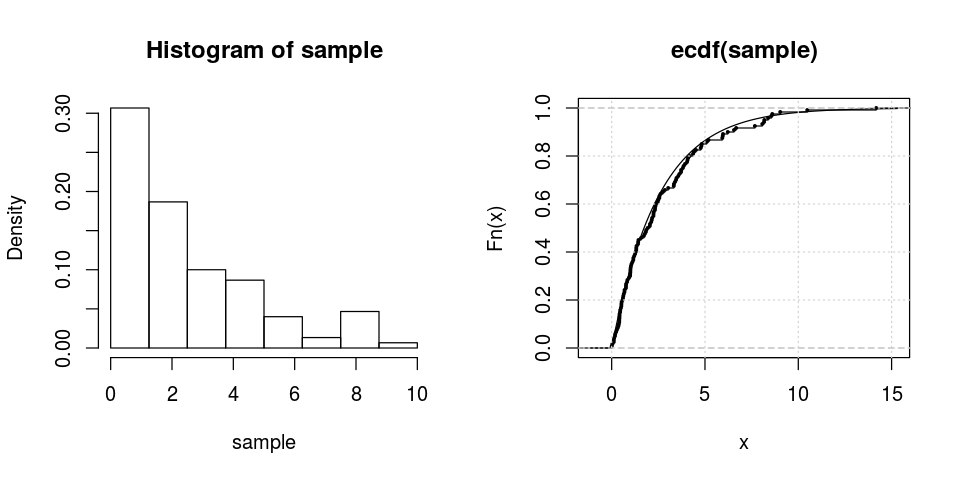

In [28]:
par(mfrow = c(1,2))
options(repr.plot.width=8, repr.plot.height=4)

sample = c(0.008, 0.036, 0.112, 0.115, 0.133, 0.178, 0.189, 0.238, 
           0.274, 0.323, 0.364, 0.386, 0.406, 0.409, 0.418, 0.421, 
           0.423, 0.455, 0.459, 0.496, 0.519, 0.522, 0.534, 0.582, 
           0.606, 0.624, 0.649, 0.687, 0.689, 0.764, 0.768, 0.774, 
           0.825, 0.843, 0.921, 0.987, 0.992, 1.003, 1.004, 1.015, 
           1.034, 1.064, 1.112, 1.159, 1.163, 1.208, 1.253, 1.287, 
           1.317, 1.320, 1.333, 1.412, 1.421, 1.438, 1.574, 1.719, 
           1.769, 1.830, 1.853, 1.930, 2.041, 2.053, 2.119, 2.146, 
           2.167, 2.237, 2.243, 2.249, 2.318, 2.325, 2.349, 2.372, 
           2.465, 2.497, 2.553, 2.562, 2.616, 2.739, 2.851, 3.029, 
           3.327, 3.335, 3.390, 3.447, 3.473, 3.568, 3.627, 3.718, 
           3.720, 3.814, 3.854, 3.929, 4.038, 4.065, 4.089, 4.177, 
           4.357, 4.403, 4.514, 4.771, 4.809, 4.827, 5.086, 5.191, 
           5.928, 5.952, 5.968, 6.222, 6.556, 6.670, 7.673, 8.071, 
           8.165, 8.181, 8.383, 8.557, 8.606, 9.032, 10.482, 14.174)

n = length(sample)
breaks=seq(0, 10, by=1.25)
breaks <- c(breaks, Inf)
h <- hist(sample, xlim=c(0, 10), breaks=breaks)
     
nbins = length(h$breaks)-1
nbins

h$breaks
nj = h$counts[1:nbins]
npj = n*(pexp(h$breaks[2:(nbins+1)], rate=0.4)-pexp(h$breaks[1:nbins], rate=0.4))
Kj = (nj - npj)^2/npj

nj
npj
Kj
sum(Kj)

plot(ecdf(sample), cex=0.3)
curve(pexp(x, rate=0.4), add=T)
grid()

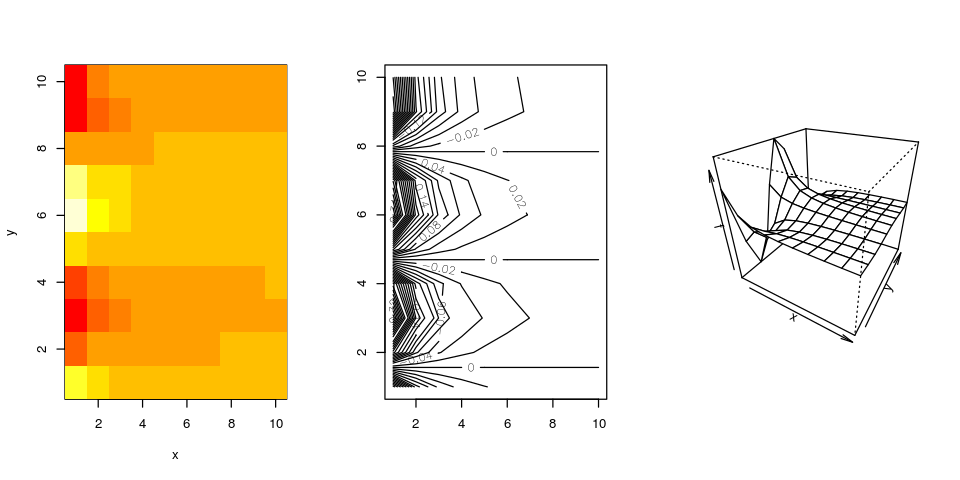

In [72]:
par(mfrow = c(1,3))
options(repr.plot.width=8, repr.plot.height=4)

x = 1:10
y=x
f=outer(x,y,function(x,y)cos(y)/(1+x^2))
image(x,y,f)
contour(x,y,f, nlevels=40)
persp(x,y,f, theta=30, phi=30)